In [44]:
import pandas as pd

# 선수들 정보 파일 불러오기
data = pd.read_csv('C:\\Users\\이진호\\Desktop\\Programming\\프로젝트\\MyProject1\\players_info.csv')
df = data.copy()

In [45]:
# 기존 데이터프레임에 '약발 상향여부'와 '평점 변화' 컬럼을 새로 추가가
df['약발 상향여부'] = df.apply(lambda x:1 if x['발(아이콘)'] < x['발(모먼트)'] else 0, axis=1)
df['평점 변화'] = df['평점(모먼트)'] - df['평점(아이콘)']
df.head(10)

,이름,발(아이콘),평점(아이콘),발(모먼트),평점(모먼트),약발 상향여부,평점 변화
0,펠레,10,8.6,10,6.8,0,-1.8
1,지네딘 지단,10,9.2,10,8.5,0,-0.7
2,호나우두,10,8.2,10,6.4,0,-1.8
3,요한 크루이프,10,8.5,10,8.2,0,-0.3
4,게르트 뮐러,10,8.6,10,8.7,0,0.1
5,로타어 마테우스,10,9.2,10,9.4,0,0.2
6,마르코 반바스텐,9,8.6,10,8.1,1,-0.5
7,페렌츠 푸스카스,8,8.4,9,8.4,1,0.0
8,파올로 말디니,9,8.8,10,8.8,1,0.0
9,로베르토 바조,10,8.2,10,9.2,0,1.0


Text(0.5, 1.0, '평점 변화 이상치')

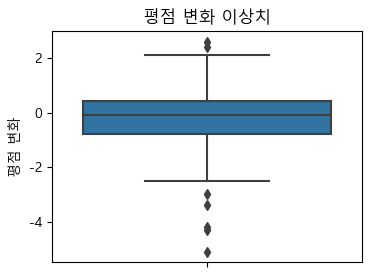

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# Boxplot 시각화 (이상치 탐지)
plt.figure(figsize=(4, 3))
sns.boxplot(y=df['평점 변화'])
plt.title('평점 변화 이상치')

In [47]:
# 이상치 제거 (4분위수 이용)
column = '평점 변화'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [48]:
# 약발 상향 여부에 따른 평점 변화 리스트 제작
score_changes_upgraded = df[df['약발 상향여부'] == 1]['평점 변화'].tolist()
score_changes_not_upgraded = df[df['약발 상향여부'] == 0]['평점 변화'].tolist()

In [52]:
# 결과를 나타내는 함수
def show_result(statistic, pvalue, alpha):
    print(f"statistic: {statistic}, pvalue: {pvalue}")

    if pvalue < alpha:
        print("귀무가설 기각 -> 약발이 상향된 선수들의 평점 변화가 더 큽니다.")
    else:   
        print("귀무가설 채택 -> 약발이 상향된 선수들의 평점 변화가 더 크지 않습니다.")

In [53]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

shapiro_upgraded = shapiro(score_changes_upgraded)
shapiro_not_upgraded = shapiro(score_changes_not_upgraded)

print("약발이 상향된 선수들의 평점 변화에 대한 정규성 검정 결과:", shapiro_upgraded)
print("약발 변화가 없는 선수들의 평점 변화에 대한 정규성 검정 결과:", shapiro_not_upgraded)
print('------------------------------------------------------------------------------------------------\n')

alpha = 0.05  # 유의수준 5%

if (shapiro_upgraded.pvalue > alpha) and (shapiro_not_upgraded.pvalue > alpha):
    print("두 그룹 선수들의 평점 변화가 정규성을 따릅니다.")
    print("독립 표본 t-검정 수행")
    t_stat, p_value = ttest_ind(score_changes_upgraded, score_changes_not_upgraded, alternative='greater')
    show_result(t_stat, p_value, alpha)

else:
    print("두 그룹 선수들의 평점 변화가 정규성을 따르지 않습니다.")
    print("Mann-Whitney U 검정 수행")
    u_stat, p_value = mannwhitneyu(score_changes_upgraded, score_changes_not_upgraded, alternative='greater')
    show_result(u_stat, p_value, alpha)   

약발이 상향된 선수들의 평점 변화에 대한 정규성 검정 결과: ShapiroResult(statistic=0.9308459162712097, pvalue=0.0191301628947258)
약발 변화가 없는 선수들의 평점 변화에 대한 정규성 검정 결과: ShapiroResult(statistic=0.9924017786979675, pvalue=0.9599701762199402)
------------------------------------------------------------------------------------------------

두 그룹 선수들의 평점 변화가 정규성을 따르지 않습니다.
Mann-Whitney U 검정 수행
statistic: 1664.0, pvalue: 0.006242219699448645
귀무가설 기각 -> 약발이 상향된 선수들의 평점 변화가 더 큽니다.


In [51]:
# 새롭게 수정된 데이터프레임을 csv 파일로 저장
df.to_csv('C:\\Users\\이진호\\Desktop\\Programming\\프로젝트\\MyProject1\\players_data.csv', encoding='utf-8-sig', index = 0)